In [71]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv('../.env'))
from openai import OpenAI
import openai
client = OpenAI()
openai.api_key  = os.getenv('OPENAI_API_KEY') 
import re
import pandas as pd

In [39]:
import tiktoken
from scipy.spatial.distance import cosine

In [4]:
bus_datas_df=pd.read_csv('2023_bus.csv', encoding="cp949")

bus_datas_df=bus_datas_df.rename(columns={
  "사용년월": "USE_MON",
  "노선번호": "BUS_ROUTE_NO",
  "노선명": "BUS_ROUTE_NM",
  "표준버스정류장ID": "STND_BSST_ID",
  "버스정류장ARS번호": "BSST_ARS_NO",
  "역명": "BUS_STA_NM",
  "00시승차총승객수": "MIDNIGHT_RIDE_NUM",
  "00시하차총승객수": "MIDNIGHT_ALIGHT_NUM",
  "1시승차총승객수": "ONE_RIDE_NUM",
  "1시하차총승객수": "ONE_ALIGHT_NUM",
  "2시승차총승객수": "TWO_RIDE_NUM",
  "2시하차총승객수": "TWO_ALIGHT_NUM",
  "3시승차총승객수": "THREE_RIDE_NUM",
  "3시하차총승객수": "THREE_ALIGHT_NUM",
  "4시승차총승객수": "FOUR_RIDE_NUM",
  "4시하차총승객수": "FOUR_ALIGHT_NUM",
  "5시승차총승객수": "FIVE_RIDE_NUM",
  "5시하차총승객수": "FIVE_ALIGHT_NUM",
  "6시승차총승객수": "SIX_RIDE_NUM",
  "6시하차총승객수": "SIX_ALIGHT_NUM",
  "7시승차총승객수": "SEVEN_RIDE_NUM",
  "7시하차총승객수": "SEVEN_ALIGHT_NUM",
  "8시승차총승객수": "EIGHT_RIDE_NUM",
  "8시하차총승객수": "EIGHT_ALIGHT_NUM",
  "9시승차총승객수": "NINE_RIDE_NUM",
  "9시하차총승객수": "NINE_ALIGHT_NUM",
  "10시승차총승객수": "TEN_RIDE_NUM",
  "10시하차총승객수": "TEN_ALIGHT_NUM",
  "11시승차총승객수": "ELEVEN_RIDE_NUM",
  "11시하차총승객수": "ELEVEN_ALIGHT_NUM",
  "12시승차총승객수": "TWELVE_RIDE_NUM",
  "12시하차총승객수": "TWELVE_ALIGHT_NUM",
  "13시승차총승객수": "THIRTEEN_RIDE_NUM",
  "13시하차총승객수": "THIRTEEN_ALIGHT_NUM",
  "14시승차총승객수": "FOURTEEN_RIDE_NUM",
  "14시하차총승객수": "FOURTEEN_ALIGHT_NUM",
  "15시승차총승객수": "FIFTEEN_RIDE_NUM",
  "15시하차총승객수": "FIFTEEN_ALIGHT_NUM",
  "16시승차총승객수": "SIXTEEN_RIDE_NUM",
  "16시하차총승객수": "SIXTEEN_ALIGHT_NUM",
  "17시승차총승객수": "SEVENTEEN_RIDE_NUM",
  "17시하차총승객수": "SEVENTEEN_ALIGHT_NUM",
  "18시승차총승객수": "EIGHTEEN_RIDE_NUM",
  "18시하차총승객수": "EIGHTEEN_ALIGHT_NUM",
  "19시승차총승객수": "NINETEEN_RIDE_NUM",
  "19시하차총승객수": "NINETEEN_ALIGHT_NUM",
  "20시승차총승객수": "TWENTY_RIDE_NUM",
  "20시하차총승객수": "TWENTY_ALIGHT_NUM",
  "21시승차총승객수": "TWENTY_ONE_RIDE_NUM",
  "21시하차총승객수": "TWENTY_ONE_ALIGHT_NUM",
  "22시승차총승객수": "TWENTY_TWO_RIDE_NUM",
  "22시하차총승객수": "TWENTY_TWO_ALIGHT_NUM",
  "23시승차총승객수": "TWENTY_THREE_RIDE_NUM",
  "23시하차총승객수": "TWENTY_THREE_ALIGHT_NUM",
  "교통수단타입코드": "MNTN_TYP_CD",
  "교통수단타입명": "MNTN_TYP_NM",
  "등록일자": "WORK_DT"
}
    )

bus_datas_df
# 새로운 CSV 파일로 저장
bus_datas_df.to_csv('NEW_BUS.csv', index=False, encoding='utf-8')


C:\Users\r2com\AppData\Local\Temp\ipykernel_18800\1099886773.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_datas_df=pd.read_csv('2023_bus.csv', encoding="cp949")


In [11]:
bus_datas_df=pd.read_csv('NEW_BUS.csv', encoding="utf-8")

C:\Users\r2com\AppData\Local\Temp\ipykernel_13460\4045328598.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_datas_df=pd.read_csv('NEW_BUS.csv', encoding="utf-8")


,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,ELEVEN_RIDE_NUM,ELEVEN_ALIGHT_NUM,TWELVE_RIDE_NUM,TWELVE_ALIGHT_NUM,THIRTEEN_RIDE_NUM,THIRTEEN_ALIGHT_NUM,FOURTEEN_RIDE_NUM,FOURTEEN_ALIGHT_NUM,FIFTEEN_RIDE_NUM,FIFTEEN_ALIGHT_NUM,SIXTEEN_RIDE_NUM,SIXTEEN_ALIGHT_NUM,SEVENTEEN_RIDE_NUM,SEVENTEEN_ALIGHT_NUM,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM,TWENTY_THREE_RIDE_NUM,TWENTY_THREE_ALIGHT_NUM,MNTN_TYP_CD,MNTN_TYP_NM,WORK_DT
0,202312,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리(00075),132,160,114,120,0,0,0,0,0,0,0,0,143,94,453,308,382,314,352,409,298,389,298,433,317,443,286,456,291,509,410,516,293,593,369,621,407,726,391,489,314,219,267,179,234,240,265,159,10,서울간선버스,20240103
1,202312,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리(00032),10,10,199,191,197,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,서울심야버스,20240103
2,202312,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리(00066),127,133,13,7,15,1,0,0,0,0,0,0,226,81,647,281,506,335,518,379,496,357,584,499,569,451,510,513,419,438,345,483,318,605,398,626,409,611,367,524,345,306,350,272,340,315,251,228,10,서울간선버스,20240103
3,202312,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리(00089),0,0,0,0,147,104,319,177,104,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,서울심야버스,20240103
4,202312,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원(00031),0,0,0,0,0,0,0,0,198,194,109,210,60,281,162,412,344,779,221,409,131,256,157,194,114,149,96,177,169,217,185,116,189,82,219,80,186,53,80,35,57,18,29,28,34,38,16,6,10,서울간선버스,20240103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41669,202312,9404,9404번(분당구미~신사역),999800003,~,구미동차고지(기점가상)(00001),0,1,1,3,0,0,1,0,21,0,3,0,0,4,0,0,0,1,0,1,2,1,0,0,1,0,3,1,1,0,0,1,0,0,0,0,1,0,0,0,0,3,0,1,0,3,1,1,50,서울광역버스,20240103
41670,202312,9404,9404번(분당구미~신사역),999800004,~,구미동차고지(종점가상)(00060),2,11,0,6,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,3,0,3,0,1,0,1,0,4,0,5,0,3,50,서울광역버스,20240103
41671,202312,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00078),0,5,0,12,0,1,0,0,0,0,0,0,0,0,0,2,0,2,0,6,0,1,0,2,0,5,0,8,0,3,0,1,0,6,0,0,0,4,0,3,0,2,0,2,0,3,0,1,50,서울광역버스,20240103
41672,202312,9701,9701번(가좌동~서울역),999800005,~,가좌동종점(종점가상)(00127),0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,2,0,1,0,5,0,4,0,2,0,1,0,3,0,3,0,3,0,1,0,3,0,0,0,0,0,5,0,2,50,서울광역버스,20240103


In [6]:
import json

text = """
USE_MON	사용년월
BUS_ROUTE_NO	노선번호
BUS_ROUTE_NM	노선명
STND_BSST_ID	표준버스정류장ID
BSST_ARS_NO	버스정류장ARS번호
BUS_STA_NM	역명
MIDNIGHT_RIDE_NUM	00시승차총승객수
MIDNIGHT_ALIGHT_NUM	00시하차총승객수
ONE_RIDE_NUM	1시승차총승객수
ONE_ALIGHT_NUM	1시하차총승객수
TWO_RIDE_NUM	2시승차총승객수
TWO_ALIGHT_NUM	2시하차총승객수
THREE_RIDE_NUM	3시승차총승객수
THREE_ALIGHT_NUM	3시하차총승객수
FOUR_RIDE_NUM	4시승차총승객수
FOUR_ALIGHT_NUM	4시하차총승객수
FIVE_RIDE_NUM	5시승차총승객수
FIVE_ALIGHT_NUM	5시하차총승객수
SIX_RIDE_NUM	6시승차총승객수
SIX_ALIGHT_NUM	6시하차총승객수
SEVEN_RIDE_NUM	7시승차총승객수
SEVEN_ALIGHT_NUM	7시하차총승객수
EIGHT_RIDE_NUM	8시승차총승객수
EIGHT_ALIGHT_NUM	8시하차총승객수
NINE_RIDE_NUM	9시승차총승객수
NINE_ALIGHT_NUM	9시하차총승객수
TEN_RIDE_NUM	10시승차총승객수
TEN_ALIGHT_NUM	10시하차총승객수
ELEVEN_RIDE_NUM	11시승차총승객수
ELEVEN_ALIGHT_NUM	11시하차총승객수
TWELVE_RIDE_NUM	12시승차총승객수
TWELVE_ALIGHT_NUM	12시하차총승객수
THIRTEEN_RIDE_NUM	13시승차총승객수
THIRTEEN_ALIGHT_NUM	13시하차총승객수
FOURTEEN_RIDE_NUM	14시승차총승객수
FOURTEEN_ALIGHT_NUM	14시하차총승객수
FIFTEEN_RIDE_NUM	15시승차총승객수
FIFTEEN_ALIGHT_NUM	15시하차총승객수
SIXTEEN_RIDE_NUM	16시승차총승객수
SIXTEEN_ALIGHT_NUM	16시하차총승객수
SEVENTEEN_RIDE_NUM	17시승차총승객수
SEVENTEEN_ALIGHT_NUM	17시하차총승객수
EIGHTEEN_RIDE_NUM	18시승차총승객수
EIGHTEEN_ALIGHT_NUM	18시하차총승객수
NINETEEN_RIDE_NUM	19시승차총승객수
NINETEEN_ALIGHT_NUM	19시하차총승객수
TWENTY_RIDE_NUM	20시승차총승객수
TWENTY_ALIGHT_NUM	20시하차총승객수
TWENTY_ONE_RIDE_NUM	21시승차총승객수
TWENTY_ONE_ALIGHT_NUM	21시하차총승객수
TWENTY_TWO_RIDE_NUM	22시승차총승객수
TWENTY_TWO_ALIGHT_NUM	22시하차총승객수
TWENTY_THREE_RIDE_NUM	23시승차총승객수
TWENTY_THREE_ALIGHT_NUM	23시하차총승객수
MNTN_TYP_CD	교통수단타입코드
MNTN_TYP_NM	교통수단타입명
WORK_DT	등록일자
"""

# 텍스트를 줄 단위로 분할하고 탭을 기준으로 키와 값을 나누기
lines = text.strip().split('\n')
data_dict = {line.split('\t')[1]: line.split('\t')[0] for line in lines}

# JSON으로 변환
json_data = json.dumps(data_dict, ensure_ascii=False, indent=2)

# 결과 출력
print(json_data)


{
  "사용년월": "USE_MON",
  "노선번호": "BUS_ROUTE_NO",
  "노선명": "BUS_ROUTE_NM",
  "표준버스정류장ID": "STND_BSST_ID",
  "버스정류장ARS번호": "BSST_ARS_NO",
  "역명": "BUS_STA_NM",
  "00시승차총승객수": "MIDNIGHT_RIDE_NUM",
  "00시하차총승객수": "MIDNIGHT_ALIGHT_NUM",
  "1시승차총승객수": "ONE_RIDE_NUM",
  "1시하차총승객수": "ONE_ALIGHT_NUM",
  "2시승차총승객수": "TWO_RIDE_NUM",
  "2시하차총승객수": "TWO_ALIGHT_NUM",
  "3시승차총승객수": "THREE_RIDE_NUM",
  "3시하차총승객수": "THREE_ALIGHT_NUM",
  "4시승차총승객수": "FOUR_RIDE_NUM",
  "4시하차총승객수": "FOUR_ALIGHT_NUM",
  "5시승차총승객수": "FIVE_RIDE_NUM",
  "5시하차총승객수": "FIVE_ALIGHT_NUM",
  "6시승차총승객수": "SIX_RIDE_NUM",
  "6시하차총승객수": "SIX_ALIGHT_NUM",
  "7시승차총승객수": "SEVEN_RIDE_NUM",
  "7시하차총승객수": "SEVEN_ALIGHT_NUM",
  "8시승차총승객수": "EIGHT_RIDE_NUM",
  "8시하차총승객수": "EIGHT_ALIGHT_NUM",
  "9시승차총승객수": "NINE_RIDE_NUM",
  "9시하차총승객수": "NINE_ALIGHT_NUM",
  "10시승차총승객수": "TEN_RIDE_NUM",
  "10시하차총승객수": "TEN_ALIGHT_NUM",
  "11시승차총승객수": "ELEVEN_RIDE_NUM",
  "11시하차총승객수": "ELEVEN_ALIGHT_NUM",
  "12시승차총승객수": "TWELVE_RIDE_NUM",
  "12시하차총승객수": "TWELVE_A

In [4]:
# NaN을 제외하고 'BUS_STA_NM' 컬럼의 문자열 값만 살리기
# bus_datas_df['BUS_STA_NM'] = bus_datas_df['BUS_STA_NM'].apply(lambda x: re.sub(r'([?!0-9])','', str(x)))
bus_datas_df['BUS_STA_NM'] = bus_datas_df['BUS_STA_NM'].apply(lambda x: str(x)[:-2])

print(bus_datas_df['BUS_STA_NM'])

0             종로2가사거리(0007
1             종로2가사거리(0003
2             종로2가사거리(0006
3             종로2가사거리(0008
4         창경궁.서울대학교병원(0003
               ...        
41669    구미동차고지(기점가상)(0000
41670    구미동차고지(종점가상)(0006
41671     가좌동종점(종점가상)(0007
41672     가좌동종점(종점가상)(0012
41673            외환은행(0099
Name: BUS_STA_NM, Length: 41674, dtype: object


In [5]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [17]:
def combin_bus_info(row):
    bus_route_no=row['BUS_ROUTE_NO'].strip()
    bus_route_nm=row['BUS_ROUTE_NM'].strip()
    bus_sta_nm=row['BUS_STA_NM'].strip()
    bus_midnight_ride_num = row["MIDNIGHT_RIDE_NUM"]
    bus_midnight_alight_num = row["MIDNIGHT_ALIGHT_NUM"]
    bus_one_ride_num = row["ONE_RIDE_NUM"]
    bus_one_alight_num = row["ONE_ALIGHT_NUM"]
    bus_two_ride_num = row["TWO_RIDE_NUM"]
    bus_two_alight_num = row["TWO_ALIGHT_NUM"]
    bus_three_ride_num = row["THREE_RIDE_NUM"]
    bus_three_alight_num = row["THREE_ALIGHT_NUM"]
    bus_four_ride_num = row["FOUR_RIDE_NUM"]
    bus_four_alight_num = row["FOUR_ALIGHT_NUM"]
    bus_five_ride_num = row["FIVE_RIDE_NUM"]
    bus_five_alight_num = row["FIVE_ALIGHT_NUM"]
    bus_six_ride_num = row["SIX_RIDE_NUM"]
    bus_six_alight_num = row["SIX_ALIGHT_NUM"]
    bus_seven_ride_num = row["SEVEN_RIDE_NUM"]
    bus_seven_alight_num = row["SEVEN_ALIGHT_NUM"]
    bus_eight_ride_num = row["EIGHT_RIDE_NUM"]
    bus_eight_alight_num = row["EIGHT_ALIGHT_NUM"]
    bus_nine_ride_num = row["NINE_RIDE_NUM"]
    bus_nine_alight_num = row["NINE_ALIGHT_NUM"]
    bus_ten_ride_num = row["TEN_RIDE_NUM"]
    bus_ten_alight_num = row["TEN_ALIGHT_NUM"]
    bus_eleven_ride_num = row["ELEVEN_RIDE_NUM"]
    bus_eleven_alight_num = row["ELEVEN_ALIGHT_NUM"]
    bus_twelve_ride_num = row["TWELVE_RIDE_NUM"]
    bus_twelve_alight_num = row["TWELVE_ALIGHT_NUM"]
    bus_thirteen_ride_num = row["THIRTEEN_RIDE_NUM"]
    bus_thirteen_alight_num = row["THIRTEEN_ALIGHT_NUM"]
    bus_fourteen_ride_num = row["FOURTEEN_RIDE_NUM"]
    bus_fourteen_alight_num = row["FOURTEEN_ALIGHT_NUM"]
    bus_fifteen_ride_num = row["FIFTEEN_RIDE_NUM"]
    bus_fifteen_alight_num = row["FIFTEEN_ALIGHT_NUM"]
    bus_sixteen_ride_num = row["SIXTEEN_RIDE_NUM"]
    bus_sixteen_alight_num = row["SIXTEEN_ALIGHT_NUM"]
    bus_seventeen_ride_num = row["SEVENTEEN_RIDE_NUM"]
    bus_seventeen_alight_num = row["SEVENTEEN_ALIGHT_NUM"]
    bus_eighteen_ride_num = row["EIGHTEEN_RIDE_NUM"]
    bus_eighteen_alight_num = row["EIGHTEEN_ALIGHT_NUM"]
    bus_nineteen_ride_num = row["NINETEEN_RIDE_NUM"]
    bus_nineteen_alight_num = row["NINETEEN_ALIGHT_NUM"]
    bus_twenty_ride_num = row["TWENTY_RIDE_NUM"]
    bus_twenty_alight_num = row["TWENTY_ALIGHT_NUM"]
    bus_twenty_one_ride_num = row["TWENTY_ONE_RIDE_NUM"]
    bus_twenty_one_alight_num = row["TWENTY_ONE_ALIGHT_NUM"]
    bus_twenty_two_ride_num = row["TWENTY_TWO_RIDE_NUM"]
    bus_twenty_two_alight_num = row["TWENTY_TWO_ALIGHT_NUM"]
    bus_twenty_three_ride_num = row["TWENTY_THREE_RIDE_NUM"]
    bus_twenty_three_alight_num = row["TWENTY_THREE_ALIGHT_NUM"]
    mntn_typ_cd = row["MNTN_TYP_CD"]
    mntn_typ_nm = row["MNTN_TYP_NM"]
    work_dt = row["WORK_DT"]

    combioned = [
        f"노선번호 : {bus_route_no}",
        f"노선명 : {bus_route_nm}",
        f"역명 : {bus_sta_nm}",
        f"00시승차총객수 : {bus_midnight_ride_num}",
        f"00시하차총객수 : {bus_midnight_alight_num}",
        f"01시승차총객수 : {bus_one_ride_num}",
        f"01시하차총객수 : {bus_one_alight_num}",
        f"02시승차총객수 : {bus_two_ride_num}",
        f"02시하차총객수 : {bus_two_alight_num}",
        f"03시승차총객수 : {bus_three_ride_num}",
        f"03시하차총객수 : {bus_three_alight_num}",
        f"04시승차총객수 : {bus_four_ride_num}",
        f"04시하차총객수 : {bus_four_alight_num}",
        f"05시승차총객수 : {bus_five_ride_num}",
        f"05시하차총객수 : {bus_five_alight_num}",
        f"06시승차총객수 : {bus_six_ride_num}",
        f"06시하차총객수 : {bus_six_alight_num}",
        f"07시승차총객수 : {bus_seven_ride_num}",
        f"07시하차총객수 : {bus_seven_alight_num}",
        f"08시승차총객수 : {bus_eight_ride_num}",
        f"08시하차총객수 : {bus_eight_alight_num}",
        f"09시승차총객수 : {bus_nine_ride_num}",
        f"09시하차총객수 : {bus_nine_alight_num}",
        f"10시승차총객수 : {bus_ten_ride_num}",
        f"10시하차총객수 : {bus_ten_alight_num}",
        f"11시승차총객수 : {bus_eleven_ride_num}",
        f"11시하차총객수 : {bus_eleven_alight_num}",
        f"12시승차총객수 : {bus_twelve_ride_num}",
        f"12시하차총객수 : {bus_twelve_alight_num}",
        f"13시승차총객수 : {bus_thirteen_ride_num}",
        f"13시하차총객수 : {bus_thirteen_alight_num}",
        f"14시승차총객수 : {bus_fourteen_ride_num}",
        f"14시하차총객수 : {bus_fourteen_alight_num}",
        f"15시승차총객수 : {bus_fifteen_ride_num}",
        f"15시하차총객수 : {bus_fifteen_alight_num}",
        f"16시승차총객수 : {bus_sixteen_ride_num}",
        f"16시하차총객수 : {bus_sixteen_alight_num}",
        f"17시승차총객수 : {bus_seventeen_ride_num}",
        f"17시하차총객수 : {bus_seventeen_alight_num}",
        f"18시승차총객수 : {bus_eighteen_ride_num}",
        f"18시하차총객수 : {bus_eighteen_alight_num}",
        f"19시승차총객수 : {bus_nineteen_ride_num}",
        f"19시하차총객수 : {bus_nineteen_alight_num}",
        f"20시승차총객수 : {bus_twenty_ride_num}",
        f"20시하차총객수 : {bus_twenty_alight_num}",
        f"21시승차총객수 : {bus_twenty_one_ride_num}",
        f"21시하차총객수 : {bus_twenty_one_alight_num}",
        f"22시승차총객수 : {bus_twenty_two_ride_num}",
        f"22시하차총객수 : {bus_twenty_two_alight_num}",
        f"23시승차총객수 : {bus_twenty_three_ride_num}",
        f"23시하차총객수 : {bus_twenty_three_alight_num}",
        f"교통수단타입코드 : {mntn_typ_cd}",
        f"교통수단타입명 : {mntn_typ_nm}",
        f"등록일자 : {work_dt}"
        ]
    combioned = "\n".join(combioned)

    return f"'''{combioned}'''"

bus_datas_df["combined"] = bus_datas_df.apply(combin_bus_info, axis=1)
    


In [13]:
bus_datas_df

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,ELEVEN_RIDE_NUM,ELEVEN_ALIGHT_NUM,TWELVE_RIDE_NUM,TWELVE_ALIGHT_NUM,THIRTEEN_RIDE_NUM,THIRTEEN_ALIGHT_NUM,FOURTEEN_RIDE_NUM,FOURTEEN_ALIGHT_NUM,FIFTEEN_RIDE_NUM,FIFTEEN_ALIGHT_NUM,SIXTEEN_RIDE_NUM,SIXTEEN_ALIGHT_NUM,SEVENTEEN_RIDE_NUM,SEVENTEEN_ALIGHT_NUM,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM,TWENTY_THREE_RIDE_NUM,TWENTY_THREE_ALIGHT_NUM,MNTN_TYP_CD,MNTN_TYP_NM,WORK_DT
0,202312,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리(00075),132,160,114,120,0,0,0,0,0,0,0,0,143,94,453,308,382,314,352,409,298,389,298,433,317,443,286,456,291,509,410,516,293,593,369,621,407,726,391,489,314,219,267,179,234,240,265,159,10,서울간선버스,20240103
1,202312,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리(00032),10,10,199,191,197,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,서울심야버스,20240103
2,202312,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리(00066),127,133,13,7,15,1,0,0,0,0,0,0,226,81,647,281,506,335,518,379,496,357,584,499,569,451,510,513,419,438,345,483,318,605,398,626,409,611,367,524,345,306,350,272,340,315,251,228,10,서울간선버스,20240103
3,202312,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리(00089),0,0,0,0,147,104,319,177,104,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,서울심야버스,20240103
4,202312,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원(00031),0,0,0,0,0,0,0,0,198,194,109,210,60,281,162,412,344,779,221,409,131,256,157,194,114,149,96,177,169,217,185,116,189,82,219,80,186,53,80,35,57,18,29,28,34,38,16,6,10,서울간선버스,20240103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41669,202312,9404,9404번(분당구미~신사역),999800003,~,구미동차고지(기점가상)(00001),0,1,1,3,0,0,1,0,21,0,3,0,0,4,0,0,0,1,0,1,2,1,0,0,1,0,3,1,1,0,0,1,0,0,0,0,1,0,0,0,0,3,0,1,0,3,1,1,50,서울광역버스,20240103
41670,202312,9404,9404번(분당구미~신사역),999800004,~,구미동차고지(종점가상)(00060),2,11,0,6,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,3,0,3,0,1,0,1,0,4,0,5,0,3,50,서울광역버스,20240103
41671,202312,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00078),0,5,0,12,0,1,0,0,0,0,0,0,0,0,0,2,0,2,0,6,0,1,0,2,0,5,0,8,0,3,0,1,0,6,0,0,0,4,0,3,0,2,0,2,0,3,0,1,50,서울광역버스,20240103
41672,202312,9701,9701번(가좌동~서울역),999800005,~,가좌동종점(종점가상)(00127),0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,2,0,1,0,5,0,4,0,2,0,1,0,3,0,3,0,3,0,1,0,3,0,0,0,0,0,5,0,2,50,서울광역버스,20240103


In [15]:
# 처음부터 3,000행까지 선택
limited_bus_df = bus_datas_df.head(3000)

# 선택한 데이터프레임을 CSV 파일로 저장
limited_bus_df.to_csv('limited_bus_data.csv', index=False, encoding="utf-8")

In [22]:
limited_bus_df

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,ELEVEN_RIDE_NUM,ELEVEN_ALIGHT_NUM,TWELVE_RIDE_NUM,TWELVE_ALIGHT_NUM,THIRTEEN_RIDE_NUM,THIRTEEN_ALIGHT_NUM,FOURTEEN_RIDE_NUM,FOURTEEN_ALIGHT_NUM,FIFTEEN_RIDE_NUM,FIFTEEN_ALIGHT_NUM,SIXTEEN_RIDE_NUM,SIXTEEN_ALIGHT_NUM,SEVENTEEN_RIDE_NUM,SEVENTEEN_ALIGHT_NUM,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM,TWENTY_THREE_RIDE_NUM,TWENTY_THREE_ALIGHT_NUM,MNTN_TYP_CD,MNTN_TYP_NM,WORK_DT,combined
0,202312,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리(00075),132,160,114,120,0,0,0,0,0,0,0,0,143,94,453,308,382,314,352,409,298,389,298,433,317,443,286,456,291,509,410,516,293,593,369,621,407,726,391,489,314,219,267,179,234,240,265,159,10,서울간선버스,20240103,'''노선번호 : 741\n노선명 : 741번(진관차고지~헌인릉입구)\n역명 : 종...
1,202312,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리(00032),10,10,199,191,197,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,서울심야버스,20240103,'''노선번호 : N37\n노선명 : N37번(송파공영차고지~진관공영차고지)\n역명...
2,202312,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리(00066),127,133,13,7,15,1,0,0,0,0,0,0,226,81,647,281,506,335,518,379,496,357,584,499,569,451,510,513,419,438,345,483,318,605,398,626,409,611,367,524,345,306,350,272,340,315,251,228,10,서울간선버스,20240103,'''노선번호 : 470\n노선명 : 470번(상암차고지~안골마을)\n역명 : 종로...
3,202312,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리(00089),0,0,0,0,147,104,319,177,104,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,서울심야버스,20240103,'''노선번호 : N37\n노선명 : N37번(진관공영차고지~송파공영차고지)\n역명...
4,202312,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원(00031),0,0,0,0,0,0,0,0,198,194,109,210,60,281,162,412,344,779,221,409,131,256,157,194,114,149,96,177,169,217,185,116,189,82,219,80,186,53,80,35,57,18,29,28,34,38,16,6,10,서울간선버스,20240103,'''노선번호 : 100\n노선명 : 100번(하계동~용산구청)\n역명 : 창경궁....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,202312,144,144번(우이동~교대),102000067,3161,서울시중부기술교육원.블루스퀘어(00042),19,26,0,0,0,0,0,0,0,0,125,224,287,370,1088,738,1637,1011,1170,679,537,380,314,337,298,370,354,475,291,363,347,505,457,424,585,539,616,487,377,347,278,250,214,258,484,297,183,212,10,서울간선버스,20240103,'''노선번호 : 144\n노선명 : 144번(우이동~교대)\n역명 : 서울시중부기...
2996,202312,110B,"110번(B,국민대방향,정릉~정릉)",102000067,3161,서울시중부기술교육원.블루스퀘어(00055),3,18,0,0,0,0,0,0,0,0,54,307,89,507,267,800,475,831,315,674,198,495,197,357,198,408,202,542,294,558,265,590,312,656,311,675,329,845,238,643,173,491,110,471,245,524,89,389,10,서울간선버스,20240103,"'''노선번호 : 110B\n노선명 : 110번(B,국민대방향,정릉~정릉)\n역명 ..."
2997,202312,6211,6211번(신월동~상왕십리),102000067,3161,서울시중부기술교육원.블루스퀘어(00067),40,59,0,0,0,0,0,0,0,0,4,3,116,145,418,486,522,438,271,335,168,278,129,208,132,196,180,249,189,259,342,241,342,266,380,246,338,233,240,135,266,140,248,143,404,141,126,91,20,서울지선버스,20240103,'''노선번호 : 6211\n노선명 : 6211번(신월동~상왕십리)\n역명 : 서울...
2998,202312,400,400번(염곡동~시청),102000067,3161,서울시중부기술교육원.블루스퀘어(00093),72,110,0,0,0,0,0,0,0,0,0,0,65,134,271,456,369,572,275,383,141,244,106,217,102,190,152,226,120,272,119,255,202,328,262,385,190,331,119,265,88,177,86,195,150,233,65,137,10,서울간선버스,20240103,'''노선번호 : 400\n노선명 : 400번(염곡동~시청)\n역명 : 서울시중부기...


C:\Users\r2com\AppData\Local\Temp\ipykernel_13460\2209895434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_bus_df["combined"] = limited_bus_df.apply(combin_bus_info, axis=1)


In [12]:
def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [16]:
limited_bus_df

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,ELEVEN_RIDE_NUM,ELEVEN_ALIGHT_NUM,TWELVE_RIDE_NUM,TWELVE_ALIGHT_NUM,THIRTEEN_RIDE_NUM,THIRTEEN_ALIGHT_NUM,FOURTEEN_RIDE_NUM,FOURTEEN_ALIGHT_NUM,FIFTEEN_RIDE_NUM,FIFTEEN_ALIGHT_NUM,SIXTEEN_RIDE_NUM,SIXTEEN_ALIGHT_NUM,SEVENTEEN_RIDE_NUM,SEVENTEEN_ALIGHT_NUM,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM,TWENTY_THREE_RIDE_NUM,TWENTY_THREE_ALIGHT_NUM,MNTN_TYP_CD,MNTN_TYP_NM,WORK_DT
0,202312,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리(00075),132,160,114,120,0,0,0,0,0,0,0,0,143,94,453,308,382,314,352,409,298,389,298,433,317,443,286,456,291,509,410,516,293,593,369,621,407,726,391,489,314,219,267,179,234,240,265,159,10,서울간선버스,20240103
1,202312,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리(00032),10,10,199,191,197,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,서울심야버스,20240103
2,202312,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리(00066),127,133,13,7,15,1,0,0,0,0,0,0,226,81,647,281,506,335,518,379,496,357,584,499,569,451,510,513,419,438,345,483,318,605,398,626,409,611,367,524,345,306,350,272,340,315,251,228,10,서울간선버스,20240103
3,202312,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리(00089),0,0,0,0,147,104,319,177,104,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,서울심야버스,20240103
4,202312,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원(00031),0,0,0,0,0,0,0,0,198,194,109,210,60,281,162,412,344,779,221,409,131,256,157,194,114,149,96,177,169,217,185,116,189,82,219,80,186,53,80,35,57,18,29,28,34,38,16,6,10,서울간선버스,20240103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,202312,144,144번(우이동~교대),102000067,3161,서울시중부기술교육원.블루스퀘어(00042),19,26,0,0,0,0,0,0,0,0,125,224,287,370,1088,738,1637,1011,1170,679,537,380,314,337,298,370,354,475,291,363,347,505,457,424,585,539,616,487,377,347,278,250,214,258,484,297,183,212,10,서울간선버스,20240103
2996,202312,110B,"110번(B,국민대방향,정릉~정릉)",102000067,3161,서울시중부기술교육원.블루스퀘어(00055),3,18,0,0,0,0,0,0,0,0,54,307,89,507,267,800,475,831,315,674,198,495,197,357,198,408,202,542,294,558,265,590,312,656,311,675,329,845,238,643,173,491,110,471,245,524,89,389,10,서울간선버스,20240103
2997,202312,6211,6211번(신월동~상왕십리),102000067,3161,서울시중부기술교육원.블루스퀘어(00067),40,59,0,0,0,0,0,0,0,0,4,3,116,145,418,486,522,438,271,335,168,278,129,208,132,196,180,249,189,259,342,241,342,266,380,246,338,233,240,135,266,140,248,143,404,141,126,91,20,서울지선버스,20240103
2998,202312,400,400번(염곡동~시청),102000067,3161,서울시중부기술교육원.블루스퀘어(00093),72,110,0,0,0,0,0,0,0,0,0,0,65,134,271,456,369,572,275,383,141,244,106,217,102,190,152,226,120,272,119,255,202,328,262,385,190,331,119,265,88,177,86,195,150,233,65,137,10,서울간선버스,20240103


In [9]:
bus_datas_df["embedding"] = bus_datas_df.combined.apply(get_embedding)

In [26]:
from tqdm import tqdm


In [ ]:
# tqdm 적용
limited_bus_df["embedding"] = limited_bus_df["combined"].apply(lambda x: get_embedding(x))


In [ ]:
limited_bus_df

In [63]:
limited_bus_df.to_csv('Finish_BUS.csv',na_rep='NaN')

In [ ]:
pd.read_csv('Finish_BUS.csv')

In [33]:
tokenizer = tiktoken.get_encoding("cl100k_base")
limited_bus_df['n_tokens'] = limited_bus_df.combined.apply(lambda x : len(tokenizer.encode(x)))

C:\Users\r2com\AppData\Local\Temp\ipykernel_13460\2607118621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_bus_df['n_tokens'] = limited_bus_df.combined.apply(lambda x : len(tokenizer.encode(x)))


<Axes: >

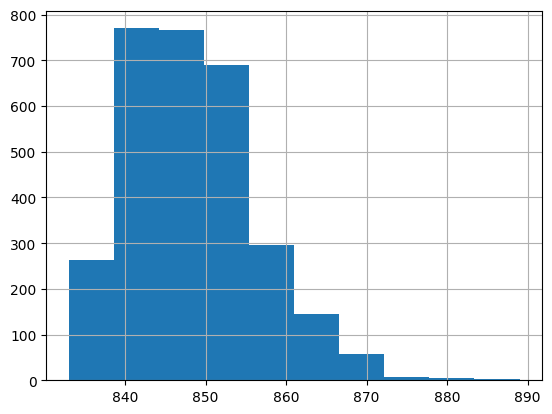

In [54]:
limited_bus_df['n_tokens'].hist()

In [58]:
def create_context(
    question, df, max_len=3000
):
    # 주어진 질문에 대한 임베딩을 생성 이는 주어진 모델("text-embedding-ada-002")을 사용하여 질문을 벡터로 변환하는 작업
    q_embeddings = client.embeddings.create(input=question, model='text-embedding-ada-002').data[0].embedding
    # 데이터프레임의 'embedding' 열에 있는 각 문장 임베딩과 주어진 질문의 임베딩 간의 코사인 유사도를 계산하고, 이를 'distances' 열에 저장합니다.
    df["distances"] = df["embedding"].apply(lambda x: cosine(q_embeddings, x))
    # 유사도 결과를 저장할 베열
    returns = []
    cur_len = 0

    # distances' 열을 기준으로 데이터프레임을 오름차순으로 정렬하면서 반복문을 시작합니다.
    # 최대 길이를 초과하면 반복문을 종료합니다.
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        cur_len += row['n_tokens'] + 4
        if cur_len > max_len:
            break
        # 현재 행의 'combined' 열에 있는 문장을 결과 리스트에 추가합니다.
        returns.append(row["combined"])
        # 결과 리스트에 있는 문장들을 "\n\n===\n\n"로 연결하여 하나의 문자열로 반환합니다.
    return ["\n\n===\n\n".join(returns)]

# 이 함수는 주어진 질문과 데이터프레임에서 유사도를 기반으로 최대 길이 내에서 가장 관련성이 높은 문장들을 선택하여 이를 하나의 문자열로 반환합니다.

In [60]:
def answer_question(
    df,
    model="gpt-3.5-turbo",
    question="버스번호가 741번중에서 제일 사람이 적은 시간대를 알려줘",
    max_len=3000,
    debug=False,
):
    context = create_context(
        question,
        df,
        max_len=max_len,
    )
    if debug:
        print("Context:\n" , context)
        print("\n\n")

    try:
        response = client.chat.completions.create(
            model=model,
            messages=[
                {"role": "system", "content": "Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\n"},
                {"role": "user", "content": f"context: {context}\n\n---\n\n Question: {question}, 한국어로 대답해줘. 자신감 있게 말해줘"}
            ],
            temperature=0,
        )
        return response.choices[0].message.content
    except Exception as e:
        print("Error occurred:", e)
        return ""

In [61]:
answer_question(limited_bus_df, question="버스번호가 741번중에서 제일 사람이 적은 시간대를 알려줘", debug=True)

C:\Users\r2com\AppData\Local\Temp\ipykernel_13460\957962331.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["distances"] = df["embedding"].apply(lambda x: cosine(q_embeddings, x))


Context:
 ["'''노선번호 : 741\n노선명 : 741번(진관차고지~헌인릉입구)\n역명 : 서울역사박물관.경희궁앞(00021)\n00시승차총객수 : 0\n00시하차총객수 : 0\n01시승차총객수 : 0\n01시하차총객수 : 0\n02시승차총객수 : 0\n02시하차총객수 : 0\n03시승차총객수 : 0\n03시하차총객수 : 0\n04시승차총객수 : 125\n04시하차총객수 : 347\n05시승차총객수 : 171\n05시하차총객수 : 265\n06시승차총객수 : 153\n06시하차총객수 : 198\n07시승차총객수 : 281\n07시하차총객수 : 414\n08시승차총객수 : 402\n08시하차총객수 : 1138\n09시승차총객수 : 331\n09시하차총객수 : 686\n10시승차총객수 : 388\n10시하차총객수 : 436\n11시승차총객수 : 522\n11시하차총객수 : 412\n12시승차총객수 : 530\n12시하차총객수 : 331\n13시승차총객수 : 462\n13시하차총객수 : 292\n14시승차총객수 : 568\n14시하차총객수 : 212\n15시승차총객수 : 588\n15시하차총객수 : 228\n16시승차총객수 : 922\n16시하차총객수 : 256\n17시승차총객수 : 1342\n17시하차총객수 : 280\n18시승차총객수 : 969\n18시하차총객수 : 211\n19시승차총객수 : 423\n19시하차총객수 : 102\n20시승차총객수 : 312\n20시하차총객수 : 62\n21시승차총객수 : 286\n21시하차총객수 : 65\n22시승차총객수 : 227\n22시하차총객수 : 52\n23시승차총객수 : 88\n23시하차총객수 : 9\n교통수단타입코드 : 10\n교통수단타입명 : 서울간선버스\n등록일자 : 20240103'''\n\n===\n\n'''노선번호 : 741\n노선명 : 741번(진관차고지~헌인릉입구)\n역명 : 서대문역사거리.농협중앙회(00020)\n00시승차총객수 : 0\n00시하차총객수 : 0\n01시승차총객수 : 0\n01시

'741번 버스 중에서 제일 사람이 적은 시간대는 02시입니다.'

In [62]:
answer_question(limited_bus_df, question="역명이 종로2가를 포함하는 것들중 승차인원이 젤 적은 시간 3개를 추천해볼래?", debug=True)

C:\Users\r2com\AppData\Local\Temp\ipykernel_13460\957962331.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["distances"] = df["embedding"].apply(lambda x: cosine(q_embeddings, x))


Context:
 ["'''노선번호 : 201\n노선명 : 201번(구리~서울역)\n역명 : 종로2가(00055)\n00시승차총객수 : 182\n00시하차총객수 : 83\n01시승차총객수 : 19\n01시하차총객수 : 36\n02시승차총객수 : 0\n02시하차총객수 : 0\n03시승차총객수 : 0\n03시하차총객수 : 0\n04시승차총객수 : 0\n04시하차총객수 : 0\n05시승차총객수 : 29\n05시하차총객수 : 94\n06시승차총객수 : 16\n06시하차총객수 : 52\n07시승차총객수 : 29\n07시하차총객수 : 118\n08시승차총객수 : 87\n08시하차총객수 : 345\n09시승차총객수 : 64\n09시하차총객수 : 183\n10시승차총객수 : 58\n10시하차총객수 : 97\n11시승차총객수 : 55\n11시하차총객수 : 126\n12시승차총객수 : 43\n12시하차총객수 : 103\n13시승차총객수 : 62\n13시하차총객수 : 145\n14시승차총객수 : 72\n14시하차총객수 : 114\n15시승차총객수 : 85\n15시하차총객수 : 112\n16시승차총객수 : 100\n16시하차총객수 : 157\n17시승차총객수 : 100\n17시하차총객수 : 171\n18시승차총객수 : 90\n18시하차총객수 : 182\n19시승차총객수 : 66\n19시하차총객수 : 76\n20시승차총객수 : 65\n20시하차총객수 : 40\n21시승차총객수 : 36\n21시하차총객수 : 65\n22시승차총객수 : 29\n22시하차총객수 : 51\n23시승차총객수 : 80\n23시하차총객수 : 45\n교통수단타입코드 : 10\n교통수단타입명 : 서울간선버스\n등록일자 : 20240103'''\n\n===\n\n'''노선번호 : 종로03\n노선명 : 종로03(낙산공원~종로5가)\n역명 : 창신쌍용2단지.한성대후문(00003)\n00시승차총객수 : 0\n00시하차총객수 : 0\n01시승차총객수 : 0\n01시하차총객수 : 0\n02시승차총객수 : 0\n02시하차총객수 

'종로2가를 포함하는 노선들 중 승차인원이 가장 적은 시간 3개는 02시, 03시, 04시입니다.'

In [67]:
limited_bus_df.to_pickle("Finish_Bus.pkl")

# 저장된 .pkl 파일 불러오기
loaded_df = pd.read_pickle("Finish_Bus.pkl")

# 불러온 DataFrame 확인
# print(loaded_df.head())
print(loaded_df['BUS_ROUTE_NO'].describe())


count     3000
unique     154
top        N15
freq        76
Name: BUS_ROUTE_NO, dtype: object


In [72]:
answer_question(limited_bus_df, question="너가 정보를 제공하는 버스는 몇가지가있고 몇개가 있어?", debug=True)

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-q02kD***************************************4ZfJ. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}